# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_excel('drq.xlsx')

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data['Question'].fillna(''))

pca = PCA(n_components=2)
tfidf_reduced = pca.fit_transform(tfidf_matrix.toarray())

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_reduced)

data['Cluster'] = clusters

def get_central_question_with_id(cluster_num):
    cluster_data = data[data['Cluster'] == cluster_num]
    similarity_matrix = cosine_similarity(tfidf_matrix[cluster_data.index])
    central_question_idx = similarity_matrix.sum(axis=1).argmax()
    central_question = cluster_data.iloc[central_question_idx]
    return central_question['Question'], central_question['ID']

central_questions_with_ids = {
    f'Cluster {i}': get_central_question_with_id(i) for i in range(num_clusters)
}

for cluster, (question, question_id) in central_questions_with_ids.items():
    print(f"{cluster}: Question - {question}, ID - {question_id}")

Cluster 0: Question - Det er en god idé, at dagpengesatsen for nyuddannede er sat ned, ID - 543
Cluster 1: Question - Der skal indføres en særlig skat på de allerhøjeste indkomster, ID - 531
Cluster 2: Question - På sigt skal Danmark meldes ud af EU, ID - 534
Cluster 3: Question - Det er fornuftigt, at Danmark i de kommende år bruger markant flere penge på forsvaret, ID - 535
Cluster 4: Question - Unge op til 24 år skal have ret til gratis offentlig psykologhjælp uden lægehenvisning, ID - 563


#### General discussion about TF-IDF, PCA and KMeans clustering ####
Usage of TF-IDF Vectorization:</br>
TfidfVectorizer is converting text data into numerical vectors by calculating Term Frequency-Inverse Document Frequency</br>
After which it is measuring weight - words importance - within the document relative to entire corpus</br>
Common words such as 'connectors' words that serve only to connect two separate senteces such as 'the' or 'and' are downweighted</br>

PCA (Principal Component Analysis) reduces TF-IDF dimensions into smaller numbers (we have chosen 2, for visualization purposes)</br>
PCA than finds principal components in the data that capture the most variance, which is used to group the data</br>

<b>KMeans</b>
The data is being group into clustes (5), based on their similarity within the reduced, 2D space.</br>
We are then finding central question in each cluster based on the cosine similarity matrix, that is calculated based on the angle between vectors, which is indicating how similar two texts (questions) are.</br>
The central question is the one that has the highest similarity to other questions within the same cluster.</br>



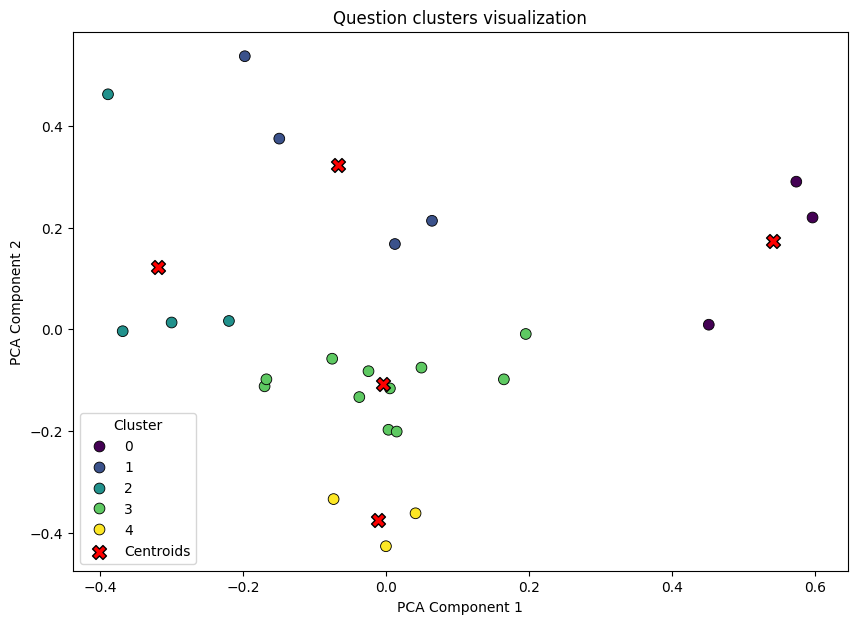

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x=tfidf_reduced[:, 0], y=tfidf_reduced[:, 1], 
                hue=data['Cluster'], palette="viridis", s=60, marker="o", 
                edgecolor="k", legend="full")

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
            c="red", s=100, marker="X", label="Centroids", edgecolor="k")

plt.title("Question clusters visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()



#### Clusters visualization ####
We can see clearly distinguished cluster with only 2 pairs of question overlapping each other.</br>
That means that the clusters are well-separated. Cluster 0 is the most separated one, meaning highest disagreement trends compared to other clusters.</br>
X-axis -> represents the first principal component, showing largest amount of variance in the data</br>
Y-axis -> represents second principal component which is orthogonal (independent) to the first on</br>
Red 'X' signs are marking centroids - central questions for each cluster.

<Figure size 1400x800 with 0 Axes>

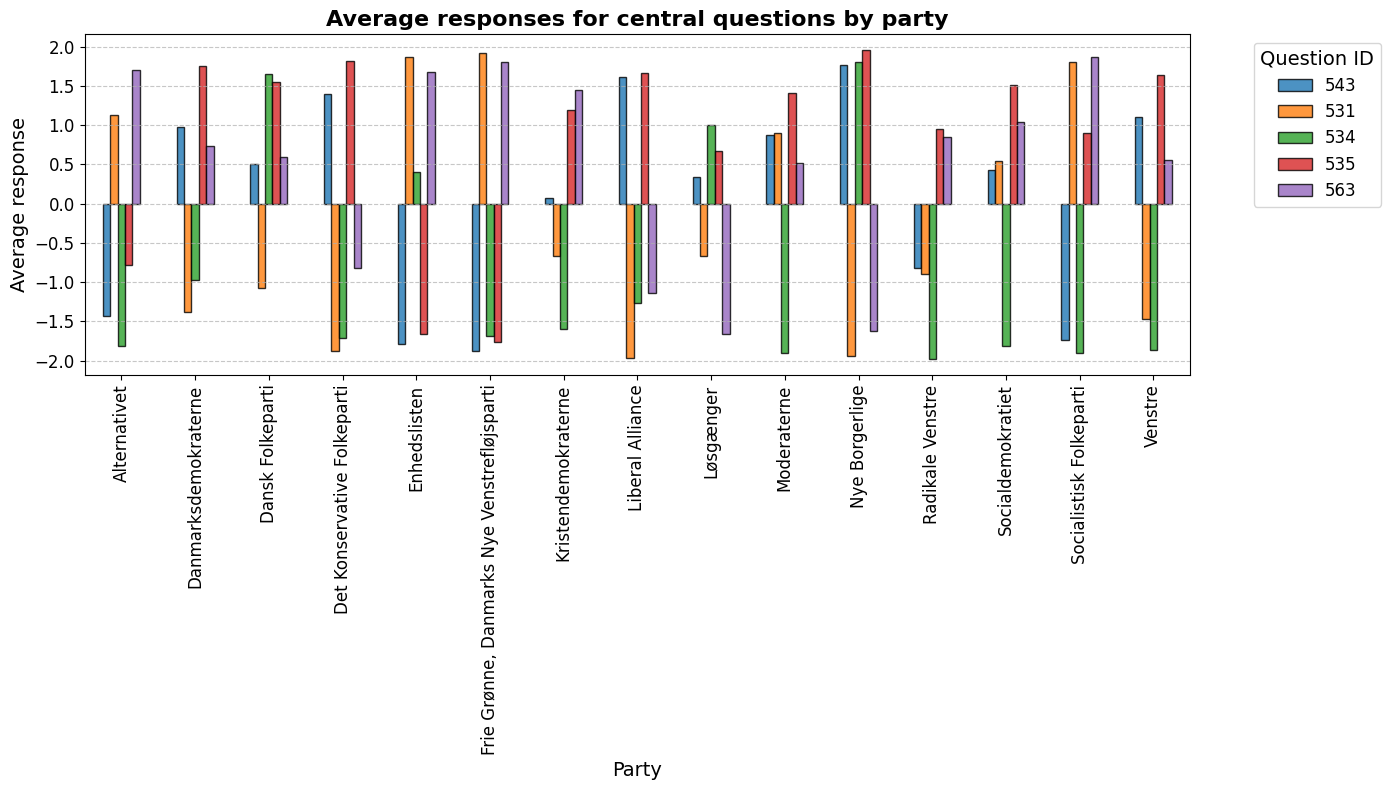

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('alldata.xlsx')
questions = ['543', '531', '534', '535', '563']

average_responses = df.groupby('parti')[questions].mean()

plt.figure(figsize=(14, 8))
average_responses.plot(kind='bar', figsize=(14, 8), edgecolor='black', alpha=0.8)

plt.title('Average responses for central questions by party', fontsize=16, fontweight='bold')
plt.xlabel('Party', fontsize=14)
plt.ylabel('Average response', fontsize=14)
plt.xticks(rotation=90, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title="Question ID", fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



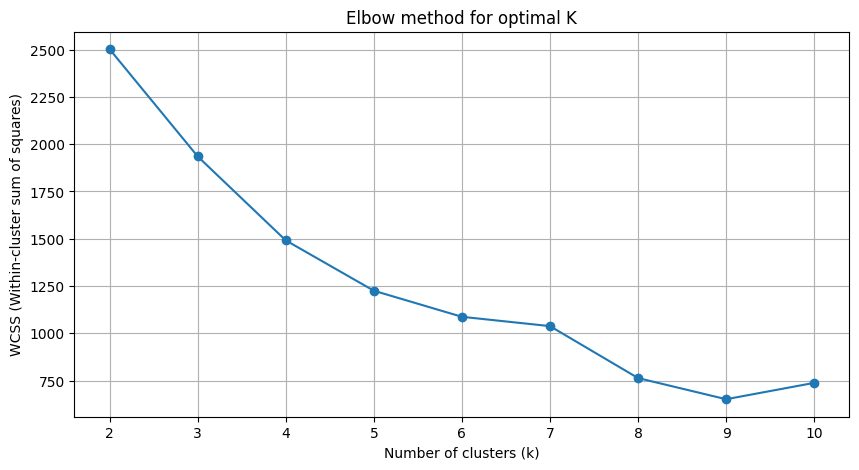

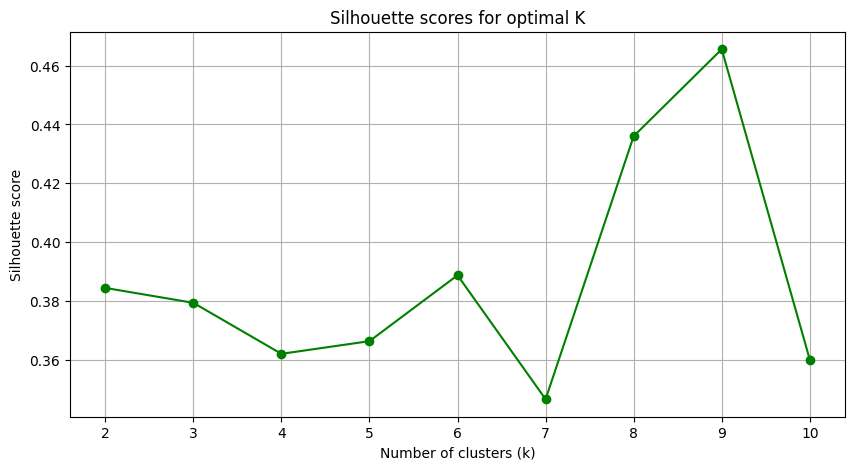

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.read_excel('alldata.xlsx')

relevant_questions = ['543', '531', '534', '535', '563']
data = df[relevant_questions]

#Simple imputation and scaling 
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)

wcss = []
silhouette_scores = []
k_range = range(2, 11) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# ELBOW
plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow method for optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette scores for optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.grid()
plt.show()

#### Elbow method & Silhouette scores ####
The elbow method is determining optimal number for clusters (K) by making an analysis of Within-Cluster Sum of Squares (WCSS) for different 'k' values</br>
WCSS is the measurement of total squared ditances between data points and respective cluster's centroids.</br>
The curve shows a sharp decline as K increases, indicating that adding additional clusters can reduce variance that can be observed <b>within</b> the respective clusters</br>
We have identified the elbow at around K = 5, because after that point, the decrease in Within-Cluster Sum of Squares appears to be marginal.</br>
Therefore we have chosen to go for 5 clusters, which seems to be reasonable decision.</br>

<b>Silhouette score for optimal K</b>
Silhouette score works as a evaluation of the quality of clustering (namely how well points are assigned to their clusters compared to other clusters as well as if there is no overlapping)</br>
A Silhouette score has a range of -1 to 1.</br>
+1 - means well-clustered and far from other clusters</br>
0 - points lie on the boundary/borders between clusters</br>
-1 - points are poorly assigned in the clusters</br>

In theory the highest silhouette score lays at K = 9, however K = 5 has moderately good score so our decision is unchanged.</br>
Additionally, different decision could be made, based on better domain knowledge that could help determining perfect number of clusters.</br>

Silhouette Score for DBSCAN: 0.753080064193423


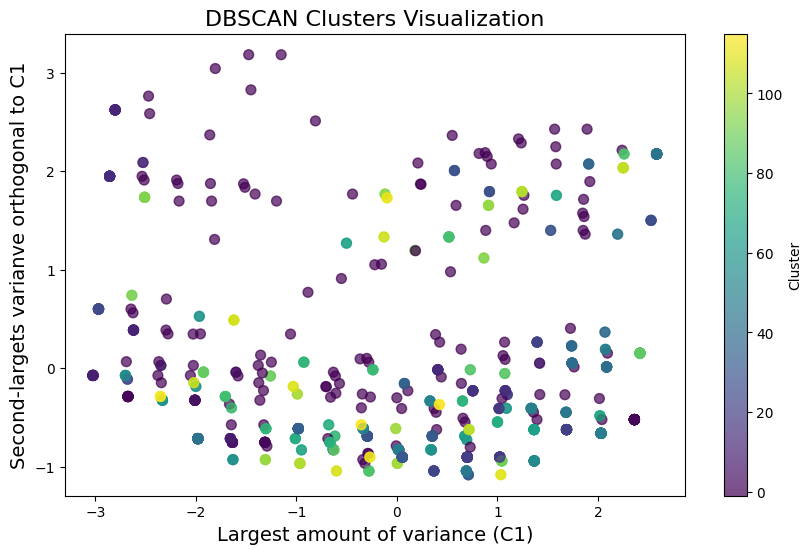

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.read_excel('alldata.xlsx')
relevant_questions = ['543', '531', '534', '535', '563']
data = df[relevant_questions]

imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)


eps = 0.5
min_samples = 2
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(scaled_data)

df['DBSCAN_Cluster'] = dbscan_labels

if len(set(dbscan_labels)) > 1:
    silhouette_avg = silhouette_score(scaled_data, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {silhouette_avg}")
else:
    print("DBSCAN resulted in a single cluster or no clusters.")

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clusters Visualization', fontsize=16)
plt.xlabel('Largest amount of variance (C1)', fontsize=14)
plt.ylabel('Second-largets varianve orthogonal to C1', fontsize=14)
plt.colorbar(label='Cluster')
plt.show()


#### Overview of results of DBSCAN clustering ####
Silhouette Score of 0.425 means moderately defined clusters. It suggests some overlapping or some clusters being poorly separated.</br>
By adjusting radius of neighbourhood (eps) and minimum number of points to form a cluster (min_samples) we can improve separation.</br>
As an example - 0.5 proved to be especially effective, 1 seems to make the results more 'dense' were eps = 2 results in only one cluster being on the visualization</br>
Additionally for 0.5 the Silhouette Score is ~0.42, whereas for 1 it scored ~0.38</br>
Above score are not taking into account tuning min_samples.</br>
One of the best Silhouette scores we managed to got was ~0.75 using eps=0.5 and min_sample = 2.</br>
The DBSCAN does not force clusters into spheres hence the 2D representation has irregular/'weird' shape/patters.</br>
X-axis: represents amount of variance in the data (the most important pattern)</br>
Y-axis: represent second-largets amount of variance that is orthogonal (independent) to Component 1/X-axis</br>


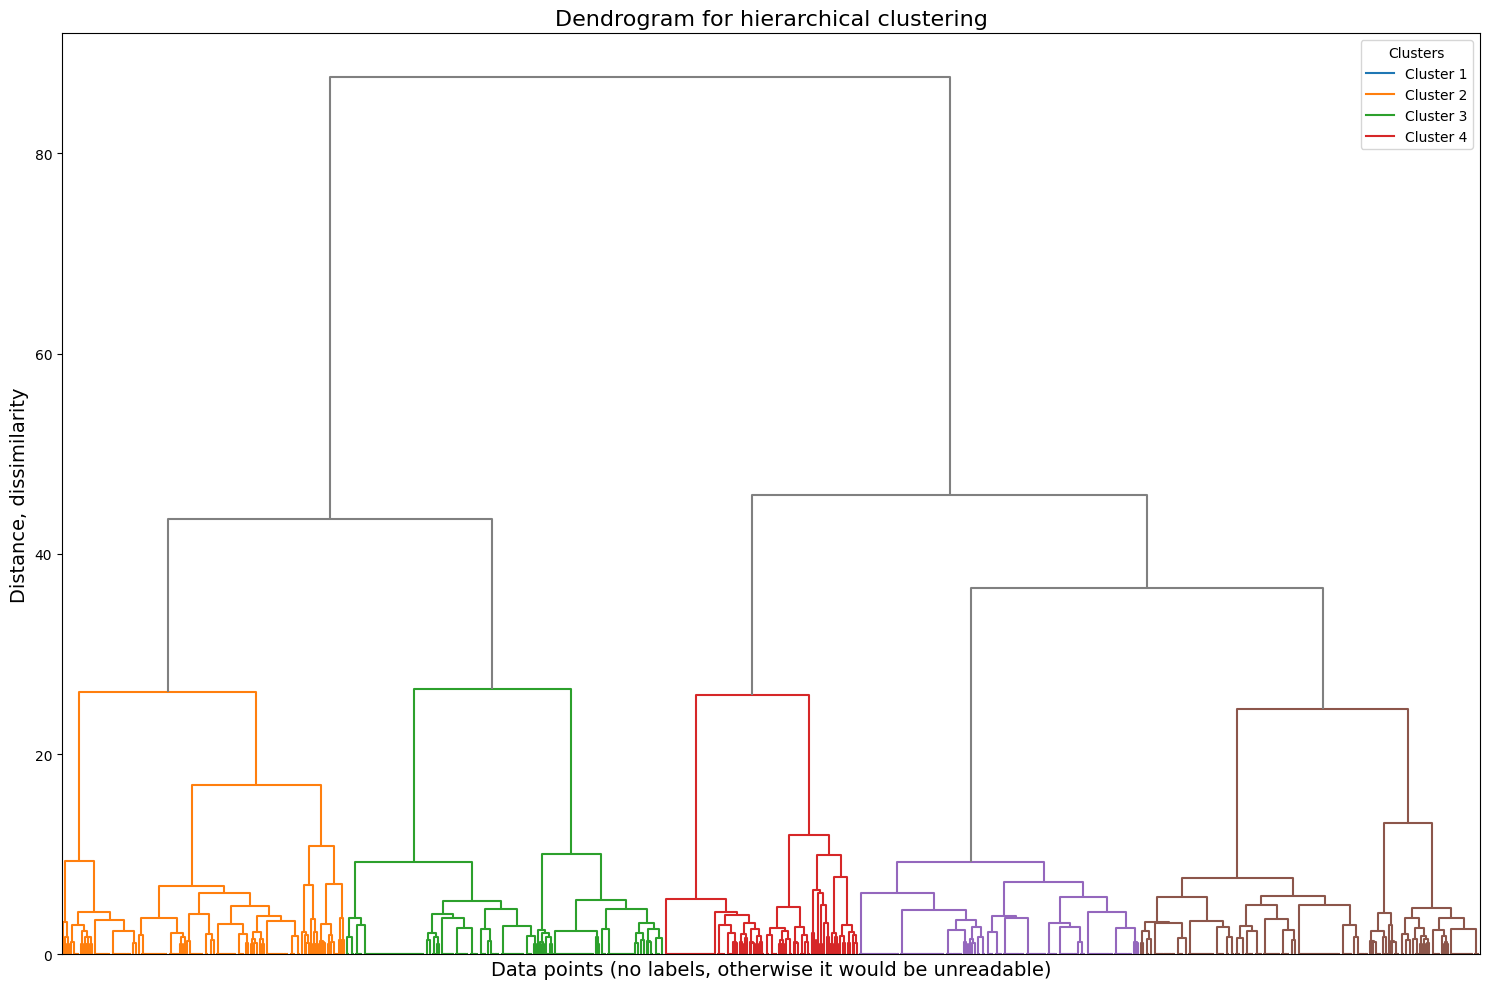

In [10]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

data = pd.read_excel('alldata.xlsx')

question_ids = ['543', '531', '534', '535', '563']
responses = data[question_ids]

linked = linkage(responses, method='ward')  

num_clusters = 4
cluster_assignments = fcluster(linked, t=num_clusters, criterion='maxclust')

plt.figure(figsize=(15, 10))
dendrogram(
    linked,
    no_labels=True, 
    color_threshold=linked[-num_clusters, 2],  
    above_threshold_color='gray'  
)

for i in range(1, num_clusters + 1):
    plt.plot([], [], label=f'Cluster {i}', color=f'C{i-1}')  

plt.title('Dendrogram for hierarchical clustering', fontsize=16)
plt.xlabel('Data points (no labels, otherwise it would be unreadable)', fontsize=14)
plt.ylabel('Distance, dissimilarity', fontsize=14)
plt.legend(title="Clusters", loc='upper right')
plt.tight_layout()
plt.show()



#### Dendrogram and hierarchical clustering ####
Ilustration of results for hierarchical clustering made on reponses using 'ward' linkage.</br>
<b>Branches:</b> representing clusters</br>
<b>Bottom:</b> representing individual data points</br>
As we move up within the dendrogram, branches are merging into larger clusters based on their similarity.</br>
Y-axis(Height) is the distance/dissimilarity between the clusters where they merge</br>
It means that the taller the branch is, the more dissimilar it is.</br>
Colours are representing different clusters (4).</br>
Example: orange cluster(1) have relatively high internal similarity - merging is happening at lower distances.</br>

Cluster 1:
Alternativet, Enhedslisten, Frie Grønne, Danmarks Nye Venstrefløjsparti

Cluster 2:
Danmarksdemokraterne, Det Konservative Folkeparti, Kristendemokraterne, Liberal Alliance, Moderaterne, Radikale Venstre, Socialdemokratiet, Venstre

Cluster 3:
Dansk Folkeparti

Cluster 4:
Løsgænger, Nye Borgerlige

Cluster 5:
Socialistisk Folkeparti



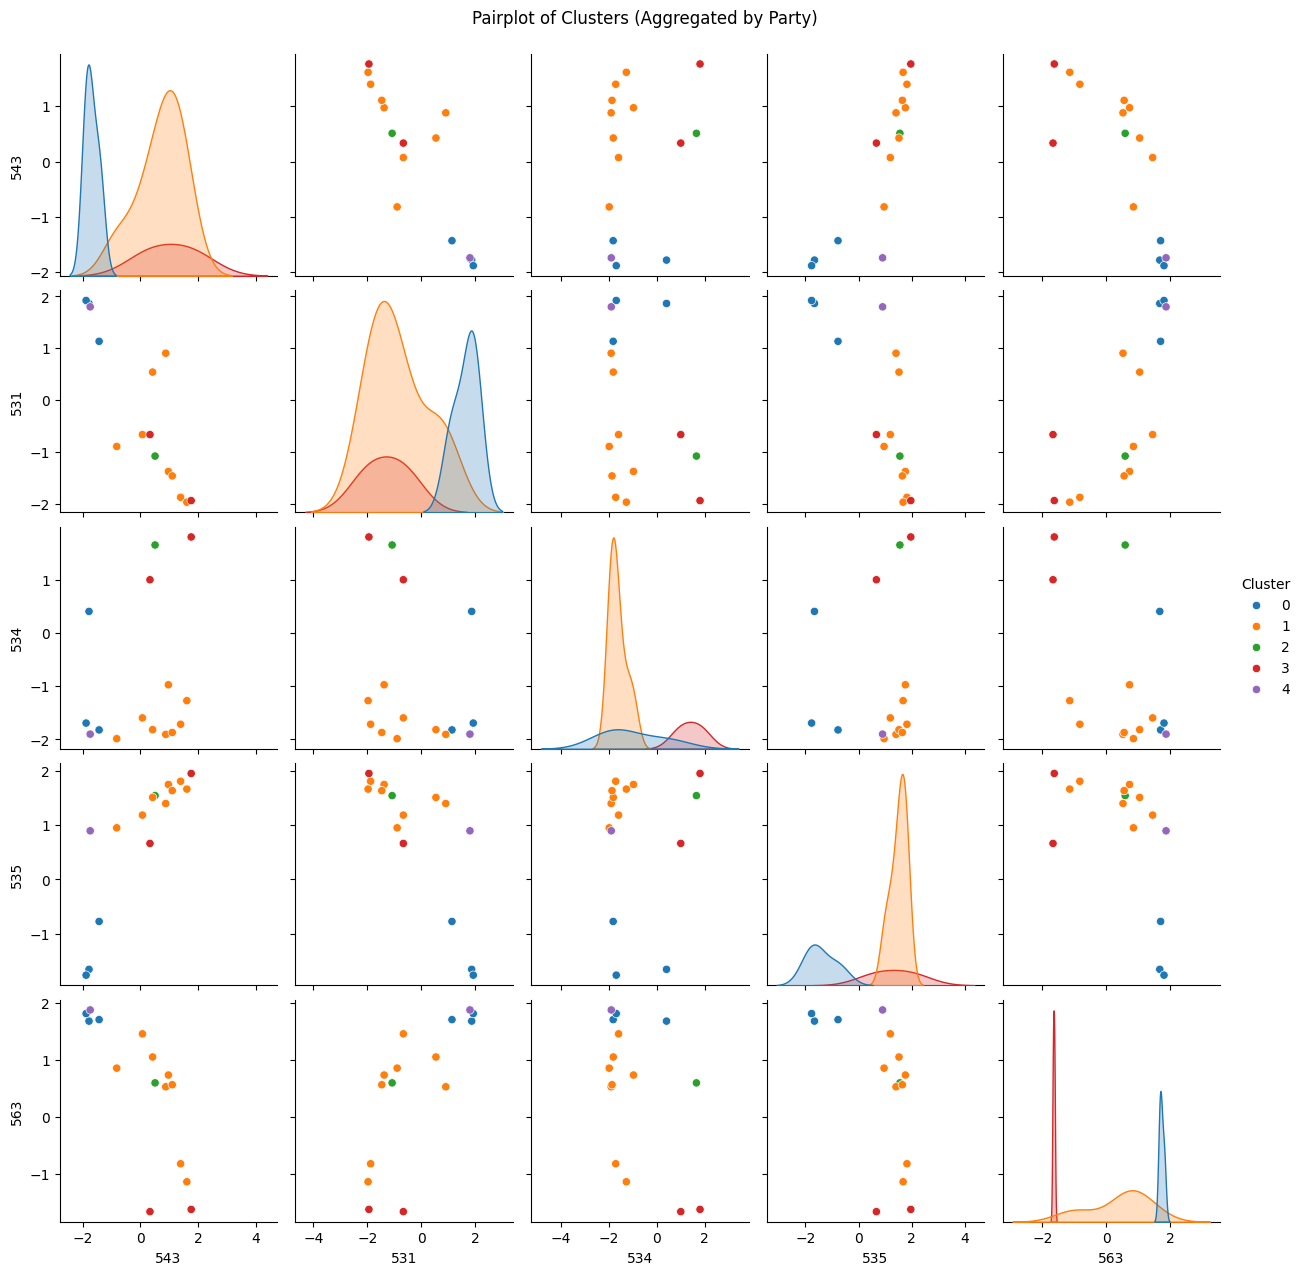

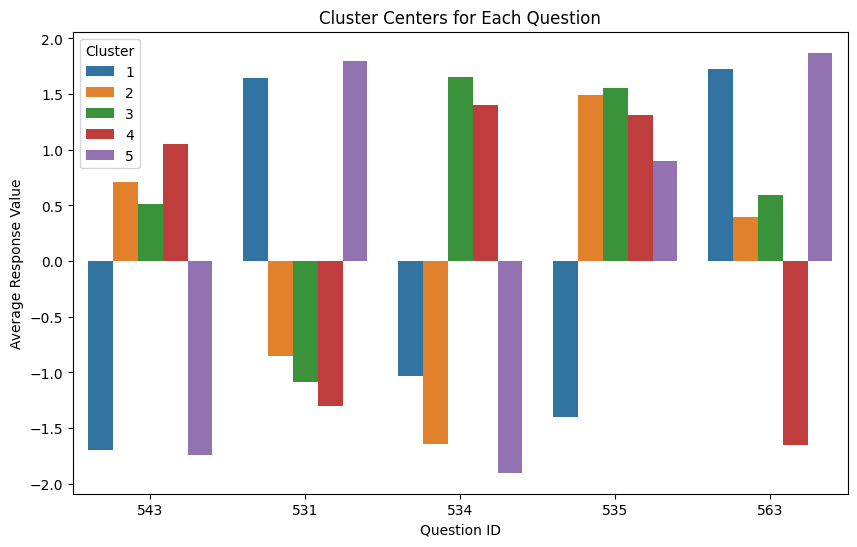

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('alldata.xlsx')

central_questions = [543, 531, 534, 535, 563]
party_column = "parti"  

relevant_data = df[[str(qid) for qid in central_questions] + [party_column]].copy()

# Siple data precprocessing
relevant_data = relevant_data.dropna()
aggregated_data = relevant_data.groupby(party_column).mean()  
scaler = StandardScaler()
scaled_data = scaler.fit_transform(aggregated_data)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

aggregated_data['Cluster'] = clusters

for cluster_num in range(5):
    cluster_parties = aggregated_data[aggregated_data['Cluster'] == cluster_num].index.tolist()
    print(f"Cluster {cluster_num + 1}:")
    print(", ".join(cluster_parties))
    print()

aggregated_data_reset = aggregated_data.reset_index()
aggregated_data_reset['Cluster'] = aggregated_data_reset['Cluster'].astype('category')
sns.pairplot(aggregated_data_reset, hue='Cluster', palette='tab10', diag_kind='kde')
plt.suptitle("Pairplot of Clusters (Aggregated by Party)", y=1.02)
plt.show()

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers, columns=[str(qid) for qid in central_questions])
centers_df['Cluster'] = range(1, 6)

centers_melted = centers_df.melt(id_vars='Cluster', var_name='Question', value_name='Center Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=centers_melted, x='Question', y='Center Value', hue='Cluster', palette='tab10')
plt.title("Cluster Centers for Each Question")
plt.ylabel("Average Response Value")
plt.xlabel("Question ID")
plt.legend(title='Cluster')
plt.show()


#### Clustering political parties ####
Each plot is representing the distribution of a specific questions aggregated response within each cluster</br>
The peaks are showcasing the difference in response patterns.</br>
Example 1: <b>Central question 543: </b> orange cluster (1) has a tightly concentrated peak, meaning high consistency in respones.</br>
Example 2: <b>Central question 534: </b> gren cluster (3) indicates higher variation in responses</br>

Scatter plots:</br>
They are showing relationships between questions for parties in differenct clusters.</br>
Some of the clusters are very well separated (for questions 531, 534) while 535 and 563 are overlapping.</br>

Bar plot of clusters centers for each question:</br>
It showcases average reponse value (centroids) for each cluster across all questions.</br>
Example 1: Cluster 1 has positive responses for questions 534 and 563 but negative for 531 and 534.</br>
Example 2: Cluster 4 has high positive responses for all questions except the first one</br>

For more information and understanding we have also decided to print out which parties belong to which clusters</br>
This allows us to draw following conclusions:</br>
Cluster 1 -> being represented by: Alternativet, Enhedslisten, Frie Grønne, Danmarks Nye Venstrefløjsparti, shows mixed average responses.</br>
Cluster 4 -> represented by: Løsgænger, Nye Borgerlige shows mostly positive responses patterns.</br>

Generally, this visualization provides with insight which parties share similar responses (opinions?) on several questions.</br>
Additionally based on that we would be able to draw ideological groups - progressive, centrist, conservative (although for now we think we lack deep understanding of Danish political stage)</br>
Fortunately in politics there is no need for such analysis as respective parties tend to give labels to themselves.</br>
<b>We could check, for example, if their declarations are alligning with the way they vote using learning model.</b></br>

Global variance: 0.30553470870001553


C:\Users\Test\AppData\Local\Temp\ipykernel_4144\3670568342.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=intra_party_disagreement.index, y='mean_variance', data=intra_party_disagreement.reset_index(), palette='Blues')


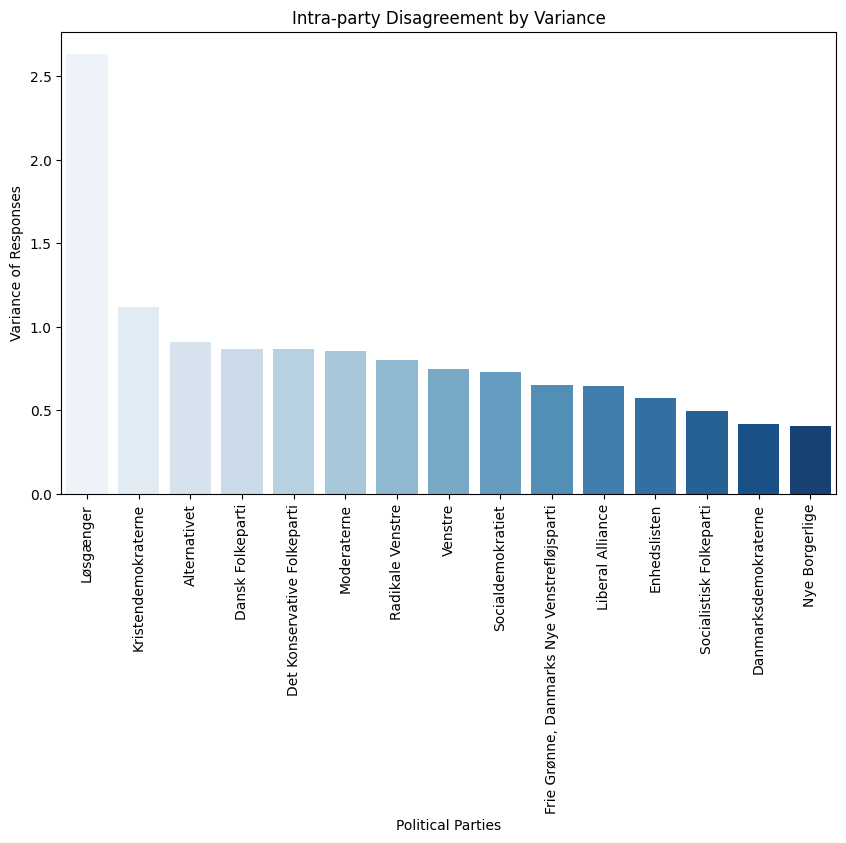

In [12]:
#From assignment #2 for reference
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('alldata.xlsx')

response_columns = data.columns.difference(['navn', 'parti', 'storkreds', 'alder'])

#numeric_response_columns = data[response_columns].select_dtypes(include=['number']).columns
print(f"Global variance: {data[response_columns].var().var()}")
# Variance for each party
party_variances = data.groupby('parti')[response_columns].var()
party_variances['mean_variance'] = party_variances.mean(axis=1)
intra_party_disagreement = party_variances[['mean_variance']].sort_values(by='mean_variance', ascending=False)

# Party's mean
party_means = data.groupby('parti')[response_columns].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=intra_party_disagreement.index, y='mean_variance', data=intra_party_disagreement.reset_index(), palette='Blues')
plt.title('Intra-party Disagreement by Variance')
plt.xlabel('Political Parties')
plt.ylabel('Variance of Responses')
plt.xticks(rotation=90)
plt.show()


<b>1:1 taken from Assignment2 - Candidate Part 1 for reference and a way to validate following analysis.</b>

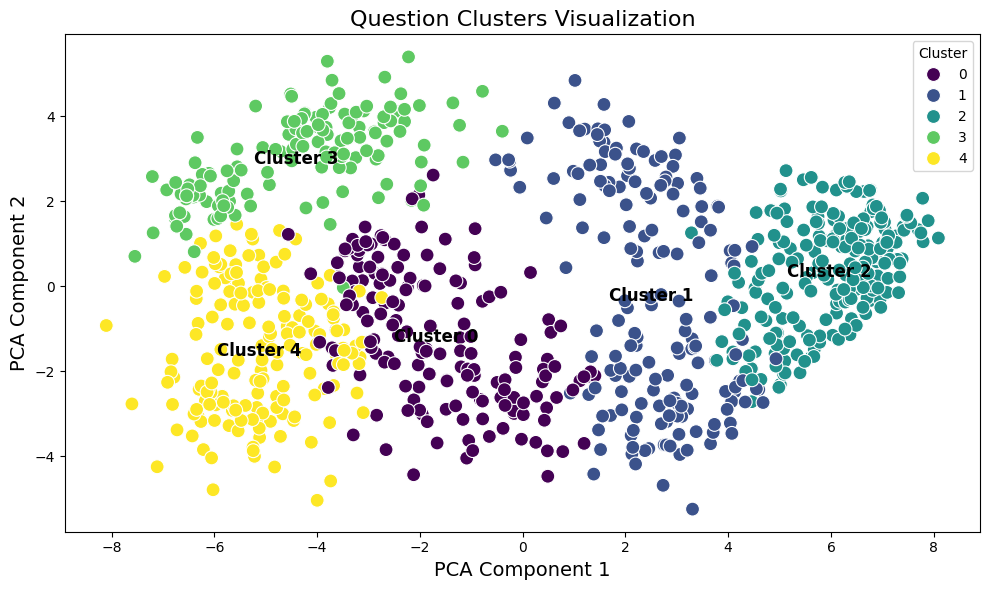

              543       531       534       535       563
Cluster                                                  
0        0.783133 -0.783133 -1.789157  1.469880  0.638554
1       -0.289773  0.039773 -1.857955  1.090909  1.062500
2       -1.712329  1.726027 -1.091324 -0.721461  1.757991
3        1.085714 -1.435714  0.914286  1.764286 -0.135714
4        1.578313 -1.909639 -1.481928  1.795181 -0.951807
Number of datapoints in the dataset: 867


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_excel('alldata.xlsx')

response_columns = data.columns.difference(['navn', 'parti', 'storkreds', 'alder'])
scaler = StandardScaler()

responses_scaled = scaler.fit_transform(data[response_columns])

kmeans = KMeans(n_clusters=5, random_state=42)  
data['Cluster'] = kmeans.fit_predict(responses_scaled)

pca = PCA(n_components=2)  
pca_components = pca.fit_transform(responses_scaled)
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)

for cluster_num in data['Cluster'].unique():
    cluster_center = data[data['Cluster'] == cluster_num][['PCA1', 'PCA2']].mean()
    plt.text(cluster_center['PCA1'], cluster_center['PCA2'], f"Cluster {cluster_num}", 
             fontsize=12, weight='bold', color='black', ha='center', va='center')

plt.title('Question Clusters Visualization', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

cluster_averages = data.groupby('Cluster')[['543', '531', '534', '535', '563']].mean()
print(cluster_averages)

# Count the total number of unique datapoints
data_count = data.shape[0]
print(f"Number of datapoints in the dataset: {data_count}")

#### Interpeting above clutsers ####
Data points representing clustering of each individual politian (867).</br>
Parties/politicians within the same cluster, may share similar opinions and idelogies</br>
The closer data points are the more similar to each other they are based on their responses.</br>
Data points further apart being more dissimilar.</br>
X-axis is representing variation in the data (it could be possible, in theory, to assign X and Y to certain political opinion eg. on economy, social policy etc.)</br>
Y-axis is representing second most significant variance orthogonal to PCA1.</br>
It would be possible by exemplary domain knowledge by associating central questions to certain policital opinions and trends.</br>
Example 1: Yellow cluster (4), is showcasing a diverse group, with moderate internal variance because of the cluster being spread along PCA1  component.</br>
Example 2: Purple cluster (0), is located centrally which may suggest politicians with balanced or mixed responsed compared to their colleagues.</br>

Additionally we have decided to print out cluster average to gain more insight and understand the problem better however in principle, it is just a numeric representation of visual for cluster center for each question which we have presented before already</br>


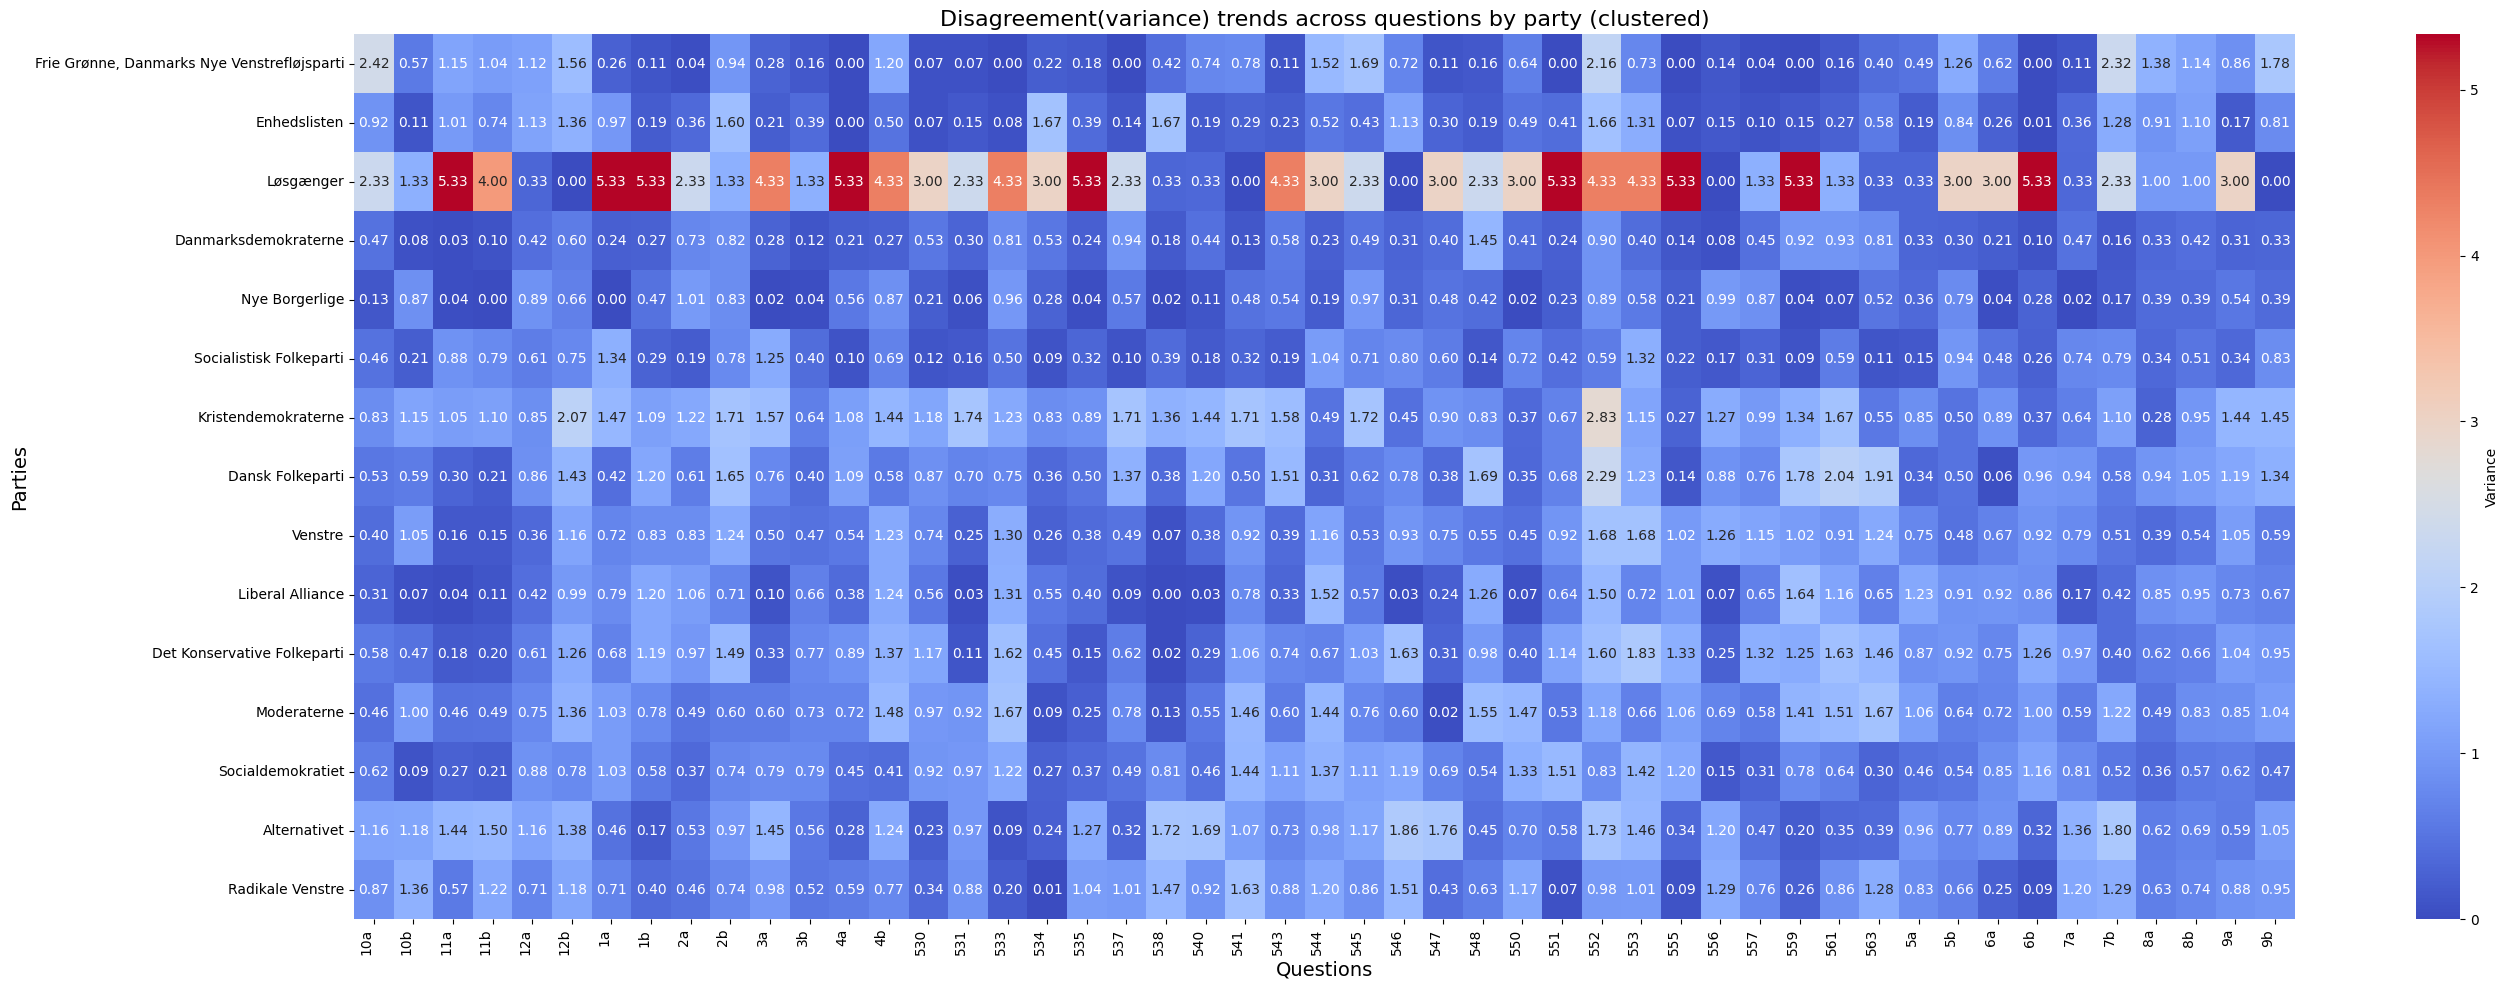

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_excel('alldata.xlsx')

response_columns = data.columns.difference(['navn', 'parti', 'storkreds', 'alder'])
party_variances = data.groupby('parti')[response_columns].var()  

kmeans = KMeans(n_clusters=5, random_state=42)  
party_variances['Cluster'] = kmeans.fit_predict(party_variances)

party_variances = party_variances.sort_values(by='Cluster')

clusters = party_variances['Cluster']
heatmap_data = party_variances.drop(columns=['Cluster'])

plt.figure(figsize=(28, 10))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': 'Variance'},
    xticklabels=True,
    yticklabels=True
)


plt.title('Disagreement(variance) trends across questions by party (clustered)', fontsize=16)
plt.xlabel('Questions', fontsize=14)
plt.ylabel('Parties', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


#### Addtional novelty ####
This is a heatmap that visualizes the variance ON EACH question for ALL the parties with exact variance shown in each square.</br>
Esentially, this is yet another representation of how much intra disagreement can be observed within each party, however this time we can see the disagreement for each individual question (also we think this graph looks super cool)</br>
Using this heatmap we have also made sure and confirmed that our conclusions from Assignment 2 - Candidated part 1 were correct</br>
<b>Therefore we conclude this assignment to be finalized.</br></b>